 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [5]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [56]:
# Reading whale returns
whale_returns_csvpath = Path("Resources/whale_returns.csv")
whale_returns_dataframe = pd.read_csv(whale_returns_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns_dataframe.sort_index(inplace=True)
whale_returns_dataframe.columns = ["SOROS", "PAULSON", "TIGER", "BERKSHIRE"]
whale_returns_dataframe.head(10)

,SOROS,PAULSON,TIGER,BERKSHIRE
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [7]:
#Exploration of Whale returns dataframe
whale_returns_dataframe.describe()

,SOROS,PAULSON,TIGER,BERKSHIRE
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [8]:
whale_returns_dataframe.dtypes

SOROS        float64
PAULSON      float64
TIGER        float64
BERKSHIRE    float64
dtype: object

In [9]:
whale_returns_dataframe.columns

Index(['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE'], dtype='object')

In [10]:
whale_returns_dataframe.sample(10)

,SOROS,PAULSON,TIGER,BERKSHIRE
Date,,,,
2018-07-19,-0.004176,-0.004656,-0.004325,-0.007676
2016-05-31,0.003186,0.002996,-0.008047,-0.000483
2019-03-07,-0.007841,0.003632,-0.013210,-0.019471
2016-04-08,0.003902,-0.005315,0.009591,0.002218
2017-12-01,0.005809,0.001531,-0.001728,-0.003915
2015-03-19,-0.000778,-0.002554,-0.002925,0.002363
2015-07-01,-0.001365,0.002100,0.005815,-0.001304
2019-01-11,0.011190,0.004232,0.002051,-0.002152
2017-09-29,0.004561,0.006170,-0.002374,0.003680


In [11]:
# Count nulls
whale_returns_dataframe.count()

SOROS        1059
PAULSON      1059
TIGER        1059
BERKSHIRE    1059
dtype: int64

In [13]:
whale_returns_dataframe["SOROS"].value_counts()

 0.000000    39
-0.001266     1
-0.003890     1
 0.005809     1
-0.006967     1
             ..
-0.001219     1
-0.001454     1
 0.000091     1
-0.000178     1
-0.005847     1
Name: SOROS, Length: 1021, dtype: int64

In [14]:
# Drop nulls
whale_returns_dataframe.isnull()
whale_returns_dataframe.isnull().mean()*100
whale_returns_dataframe.isnull().sum()
whale_returns_dataframe = whale_returns_dataframe.dropna().copy()
whale_returns_dataframe.drop_duplicates(inplace=True)
whale_returns_dataframe

whale_returns_dataframe.isnull().sum()

SOROS        0
PAULSON      0
TIGER        0
BERKSHIRE    0
dtype: int64

In [ ]:
#Drop duplicates

# whale_returns_dataframe.duplicated()
# whale_returns_dataframe = whale_returns_dataframe.drop_duplicates().copy()
# whale_returns_dataframe.count()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [15]:
# Reading algorithmic returns
algo_returns_csvpath = Path("Resources/algo_returns.csv")
algo_returns_dataframe = pd.read_csv(algo_returns_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_dataframe.sort_index(inplace=True)
algo_returns_dataframe.columns = ["ALGO1","ALGO2"]
algo_returns_dataframe.head()

,ALGO1,ALGO2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [16]:
algo_returns_dataframe.describe(include='all')

,ALGO1,ALGO2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [17]:
algo_returns_dataframe.dtypes

ALGO1    float64
ALGO2    float64
dtype: object

In [18]:
# Count nulls
algo_returns_dataframe.count()

ALGO1    1241
ALGO2    1235
dtype: int64

In [19]:
# Drop nulls
algo_returns_dataframe.isnull()
algo_returns_dataframe.isnull().mean()*100
algo_returns_dataframe.isnull().sum()
algo_returns_dataframe = algo_returns_dataframe.dropna().copy()
algo_returns_dataframe
algo_returns_dataframe.drop_duplicates(inplace=True)
algo_returns_dataframe.isnull().sum()

ALGO1    0
ALGO2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P 500 Closing Prices
sp500_returns_csvpath = Path("Resources/sp500_history.csv")
sp500_returns_dataframe = pd.read_csv(sp500_returns_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_returns_dataframe.sort_index(inplace=True)
sp500_returns_dataframe.head(25)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [21]:
sp500_returns_dataframe.describe(include="all")

,Close
count,1649
unique,1639
top,$2373.47
freq,2


In [22]:
# Check Data Types
sp500_returns_dataframe.dtypes
sp500_returns_dataframe["Close"]

Date
2012-10-01    $1444.49
2012-10-02    $1445.75
2012-10-03    $1450.99
2012-10-04    $1461.40
2012-10-05    $1460.93
                ...   
2019-04-16    $2907.06
2019-04-17    $2900.45
2019-04-18    $2905.03
2019-04-22    $2907.97
2019-04-23    $2933.68
Name: Close, Length: 1649, dtype: object

In [23]:
# Fix Data Types
sp500_returns_dataframe["Close"] = sp500_returns_dataframe["Close"].str.replace("$","")
sp500_returns_dataframe["Close"]
sp500_returns_dataframe["Close"] = sp500_returns_dataframe["Close"].astype("float")
sp500_returns_dataframe.dtypes

/usr/local/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [24]:
# Calculate Daily Returns
sp500_returns_dataframe.shape
sp500_returns_dataframe.count()
sp500_returns_dataframe = sp500_returns_dataframe.pct_change()
sp500_returns_dataframe

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [25]:
# Drop nulls
sp500_returns_dataframe.isnull()
sp500_returns_dataframe.isnull().sum()
sp500_returns_dataframe = sp500_returns_dataframe.dropna().copy()
sp500_returns_dataframe.drop_duplicates(inplace=True)
sp500_returns_dataframe.isnull()

,Close
Date,
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
2012-10-08,False
...,...
2019-04-16,False
2019-04-17,False
2019-04-18,False


In [26]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_dataframe = sp500_returns_dataframe.rename(columns={"Close":"SP500"})
sp500_returns_dataframe

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dataframe=pd.concat([whale_returns_dataframe,algo_returns_dataframe,sp500_returns_dataframe], axis="columns", join="inner")

combined_dataframe.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

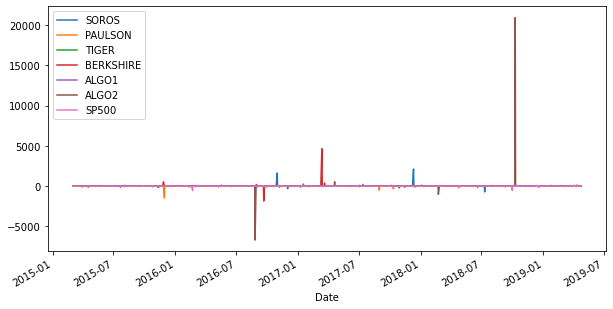

In [28]:
# Plot daily returns of all portfolios
daily_returns = combined_dataframe.pct_change().dropna()
daily_returns.head()

daily_returns.plot(figsize=(10, 5))

#### Calculate and Plot cumulative returns.

In [29]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO1,ALGO2,SP500
Date,,,,,,,
2015-03-04,-1.762070,-0.650792,5.113646,-0.641381,4.422374,-2.544766,0.966928
2015-03-05,-3.173432,-0.818399,-4.751772,-1.024002,0.491754,-4.553173,-0.263534
2015-03-06,6.246788,0.717603,17.115278,1.994020,2.552226,12.070068,3.122970
2015-03-09,-0.460116,-0.848387,-11.790828,0.251566,2.804686,-1.372559,-0.869090
2015-03-10,8.109764,1.072323,24.376117,1.482649,0.716530,12.802080,3.737134


<AxesSubplot:xlabel='Date'>

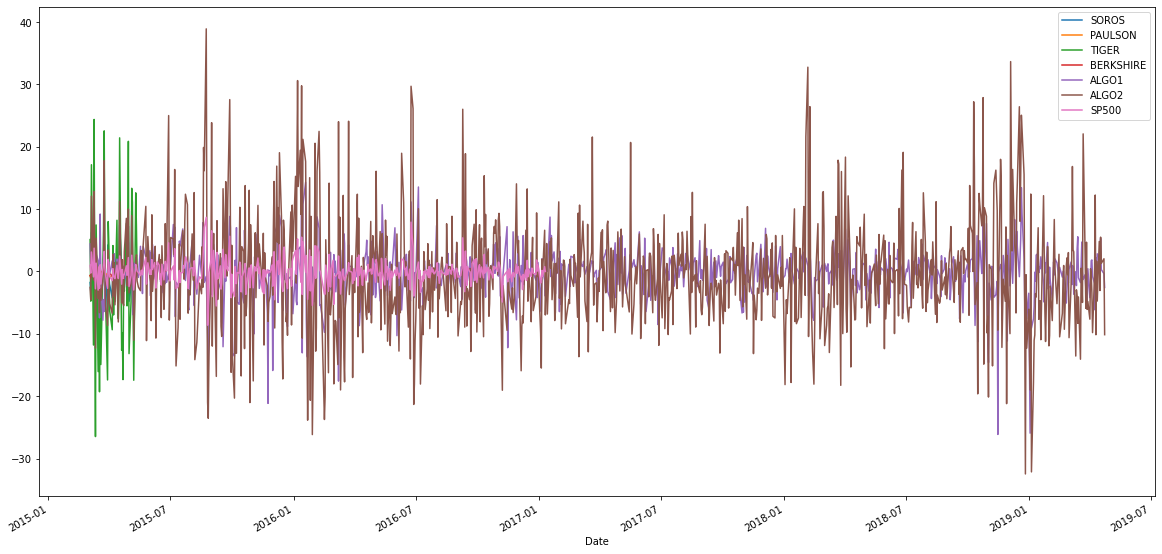

In [30]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios
daily_returns_std = daily_returns.std()
daily_returns_std.head(25)

SOROS               NaN
PAULSON             NaN
TIGER               NaN
BERKSHIRE           NaN
ALGO1         15.695867
ALGO2        691.546379
SP500               NaN
dtype: float64

In [32]:
whale_returns_std=whale_returns_dataframe.std()
whale_returns_std.head()

SOROS        0.007987
PAULSON      0.007106
TIGER        0.011024
BERKSHIRE    0.013067
dtype: float64

In [33]:
algo_returns_std=algo_returns_dataframe.std()
algo_returns_std.head()

ALGO1    0.007988
ALGO2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [34]:
# Calculate  the daily standard deviation of S&P 500
sp500_returns_std=sp500_returns_dataframe.std()
sp500_returns_std.head()

SP500    0.008111
dtype: float64

In [ ]:
# Determine which portfolios are riskier than the S&P 500
#Algo 1 and 2 are risker than Sp500

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_returns_std * np.sqrt(252)
annualized_std.head()

SOROS               NaN
PAULSON             NaN
TIGER               NaN
BERKSHIRE           NaN
ALGO1        249.164163
dtype: float64

In [36]:
sp500_annualized_std= sp500_returns_std * np.sqrt(252)
sp500_annualized_std.head()

SP500    0.128762
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

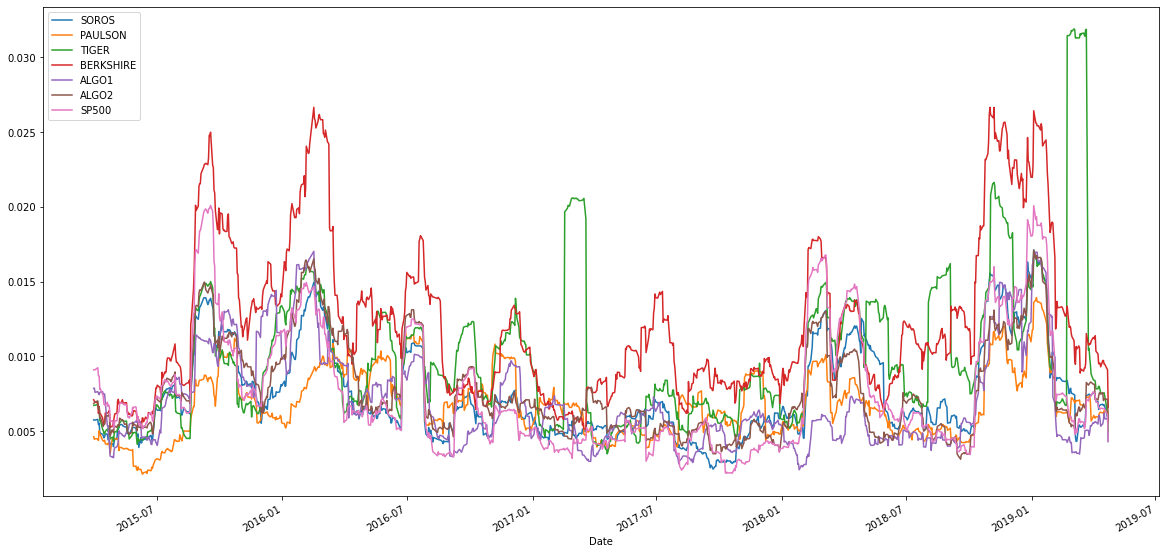

In [37]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_dataframe.rolling(window=21).std().plot(figsize=(20, 10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

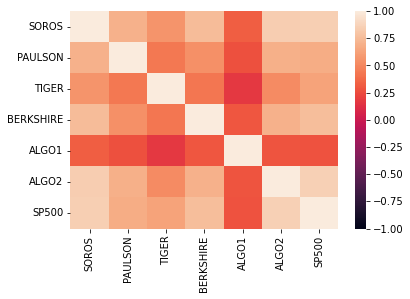

In [38]:
# Calculate the correlation
correlation = combined_dataframe.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

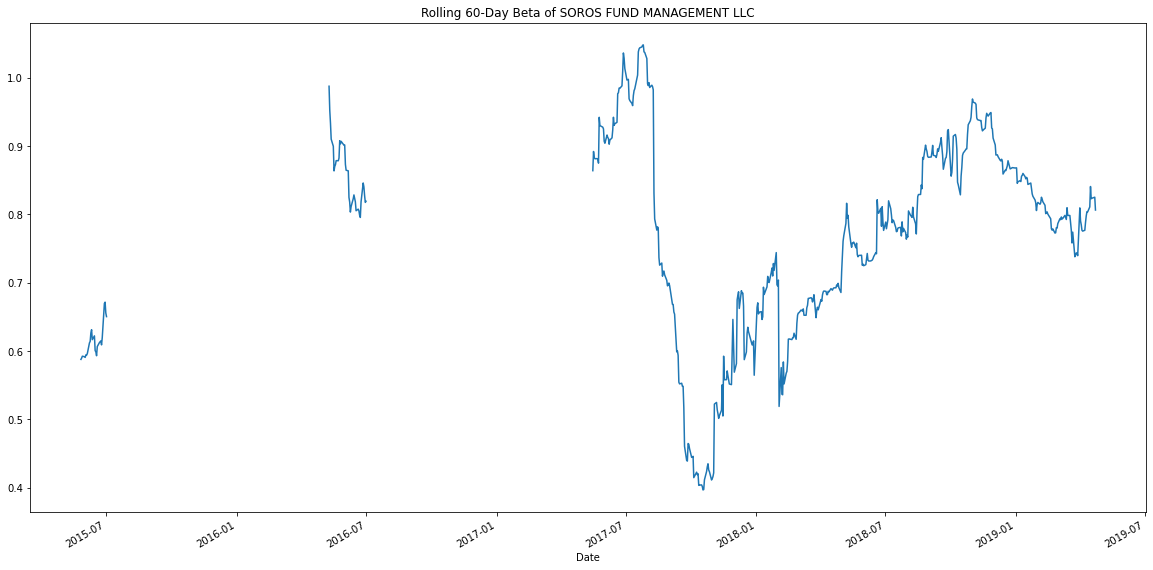

In [68]:
# Calculate covariance of a single portfolio
soros_covariance = whale_returns_dataframe['SOROS'].cov(sp500_returns_dataframe['SP500'])
soros_covariance

# Calculate variance of S&P 500
variance = sp500_returns_dataframe["SP500"].var()
variance
# Computing beta
soros_beta = soros_covariance / variance
soros_beta

rolling_soros_covariance = whale_returns_dataframe['SOROS'].rolling(window=60).cov(sp500_returns_dataframe['SP500'])
rolling_soros_variance = sp500_returns_dataframe['SP500'].rolling(window=60).var()
rolling_soros_beta = rolling_soros_covariance / rolling_soros_variance


# Plot beta trend

ax = rolling_soros_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [66]:
# Annualized Sharpe Ratios
sharpe_ratio = (
    daily_returns.mean() * 252 / (daily_returns.std() * np.sqrt(252))
)

sharpe_ratio

SOROS             NaN
PAULSON           NaN
TIGER             NaN
BERKSHIRE         NaN
ALGO1       -0.748770
ALGO2        0.272911
SP500             NaN
dtype: float64

<AxesSubplot:>

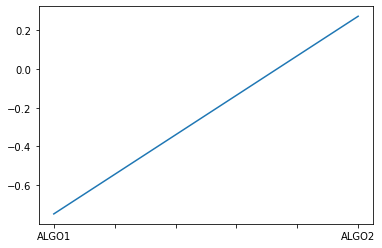

In [74]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!